# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Sara Niemann

Datum: 13.11.2023

Gruppe: 11

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Was ist die Wärmekapazität der Tasse?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.

Wie in der Aufgabenstellung gefordert, wurden 2 Behälter mit jeweils warmen oder kalten Wasser geholt. Dann wurden die Sensoren hineingelegt. Während der Messung wurde das Wasser des Glases mitsamt dem Sensor in die Tasse gekippt. Somit messen beide Sensoren die Temperatur der Mischung.

<img src="figures/versuch_bild_heat_capacity.jpg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

file_name = "heat_capacity.h5"

# DONE #

In [10]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
with h5py.File("data/heat_capacity/" + file_name, "r") as f:

    data_t1 = f["RawData"]["1ee89480-3fa2-65d0-a5b9-b7e8facea100"]["temperature"][:30]
    data_t2 = f["RawData"]["1ee89484-f039-644f-9e83-5ad4e3b45335"]["temperature"][:30]
    data_time1 = f["RawData"]["1ee89480-3fa2-65d0-a5b9-b7e8facea100"]["timestamp"][:30]

# DONE #

#### (ii) Daten ploten

Text(0.5, 1.0, 'Temperatur beider Sensoren über Zeit')

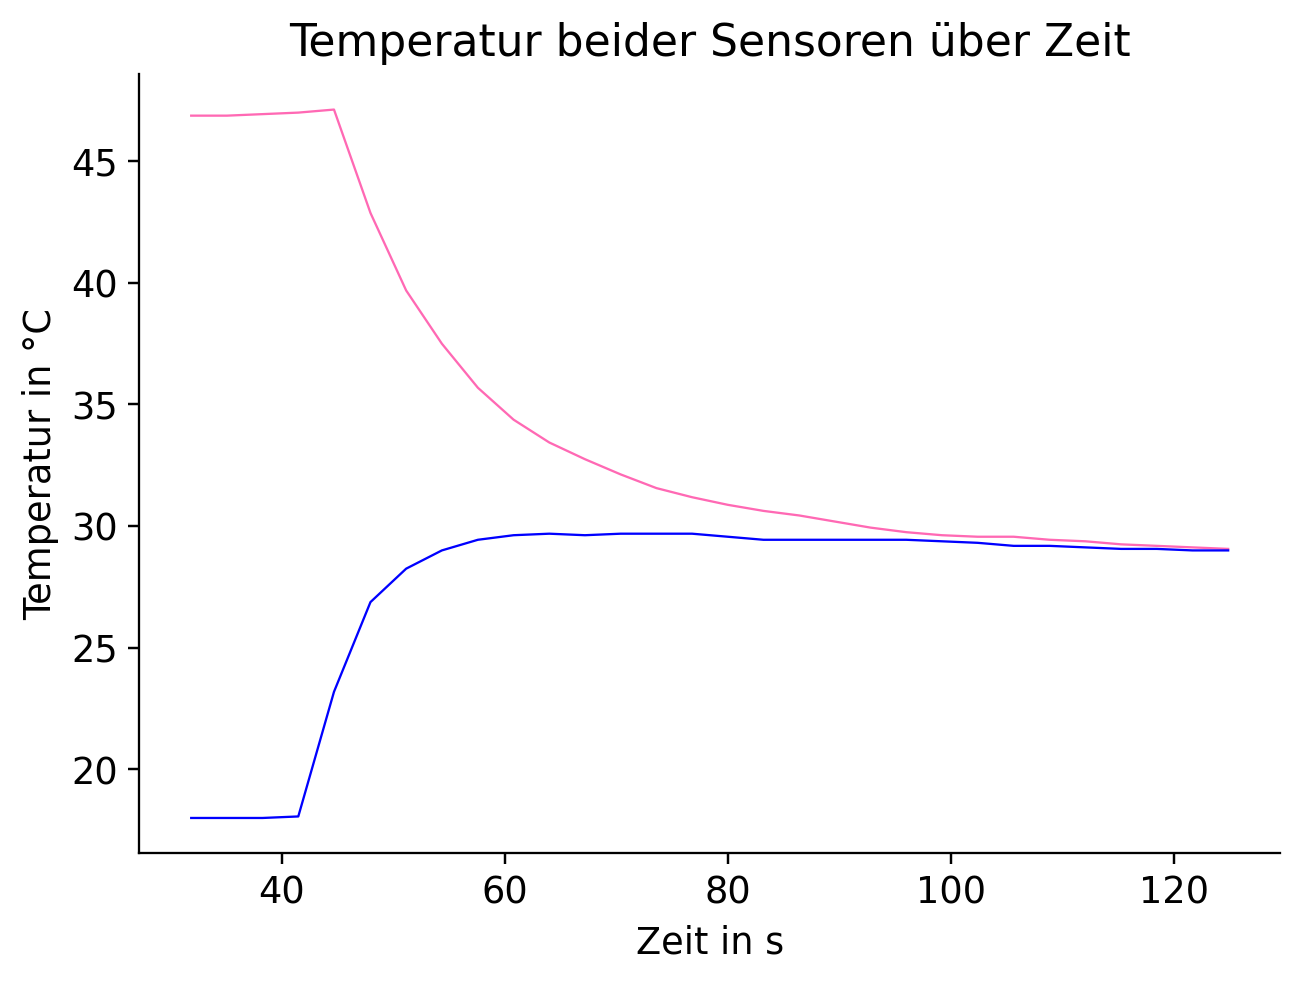

In [11]:
# TODO: Use the temperature and time data for plotting

plt.plot(data_time1, data_t1, color ="hotpink", label = "Sensor 1")
plt.plot(data_time1, data_t2, color ="blue", label = "Sensor 2")
    
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")
plt.title("Temperatur der beiden Sensoren über der Zeit")

# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [9]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.
import json

with open("datasheets/probe_heat_capacity.json") as f:
    metadata = json.load(f)
    
mass_data =metadata["probe"]["metadata"]
#print(mass_data) zum Testen

#Lasse die Zahl aus den Metadaten auslesen
masss = [int(s) for s in mass_data.split() if s.isdigit()]
s = [str(i) for i in masss]

#speicherung als Integer für Rechnung
mass = int("".join(s))

# DONE #

#### (iV) Anfangs- und Endwert der Temperatur

In [12]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
start_temperature_1 = data_t1[0]
start_temperature_2 = data_t2[0]
misch_temp = (data_t1[29]+data_t2[29])/2

# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [14]:
# TODO: Calculate heat capacity of the calorimeter
# Kennwerte
c_w = 4190                          #[J/kg K]
T_m = misch_temp + 273.15           #[K]
T_2 = start_temperature_2 + 273.15  #[K]
T_1 = start_temperature_1 + 273.15  #[K]
m_cup = mass/1000                   #[kg]
m_add = mass/1000                   #[kg]

# Wärmekapazität berechnen
C = c_w*(m_add*((T_2-T_m)/(T_m-T_1))-m_cup) #[J/K]

# DONE #

#### (Vi) Ergebnis

In [19]:
# TODO: Print result

print(C)
C_rounded = round(C, 2)
print("Wärmekapazität = {} J/K".format(C_rounded))

# DONE #

-239.95271453590192
Wärmekapazität = -239.95 J/K


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Die Wärmekapazität von -239,95 J/K deutet auf ein instabiles System hin, da die Tasse auch wärmer als die Umgebung ist.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

In [21]:
Ich habe gelernt, dass Wärmekapazitäten auch negativ sein können.

SyntaxError: invalid syntax (<ipython-input-21-af20cb150775>, line 1)